<a href="https://colab.research.google.com/github/swanandiparnaik/DS_assignment/blob/main/Forestfires_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [7]:
data=pd.read_csv('/content/forestfires (1).csv')
data

month  day  FFMC    DMC  ...  monthnov  monthoct  monthsep  size_category
0     mar  fri  86.2   26.2  ...         0         0         0          small
1     oct  tue  90.6   35.4  ...         0         1         0          small
2     oct  sat  90.6   43.7  ...         0         1         0          small
3     mar  fri  91.7   33.3  ...         0         0         0          small
4     mar  sun  89.3   51.3  ...         0         0         0          small
..    ...  ...   ...    ...  ...       ...       ...       ...            ...
512   aug  sun  81.6   56.7  ...         0         0         0          large
513   aug  sun  81.6   56.7  ...         0         0         0          large
514   aug  sun  81.6   56.7  ...         0         0         0          large
515   aug  sat  94.4  146.0  ...         0         0         0          small
516   nov  tue  79.5    3.0  ...         1         0         0          small

[517 rows x 31 columns]

In [8]:
data=data.drop(['month','day'],axis=1)

In [9]:
mapping = {'small': 1, 'large': 2}

In [10]:
data = data.replace(mapping)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [12]:
data.describe()

FFMC         DMC  ...    monthsep  size_category
count  517.000000  517.000000  ...  517.000000     517.000000
mean    90.644681  110.872340  ...    0.332689       1.268859
std      5.520111   64.046482  ...    0.471632       0.443796
min     18.700000    1.100000  ...    0.000000       1.000000
25%     90.200000   68.600000  ...    0.000000       1.000000
50%     91.600000  108.300000  ...    0.000000       1.000000
75%     92.900000  142.400000  ...    1.000000       2.000000
max     96.200000  291.300000  ...    1.000000       2.000000

[8 rows x 29 columns]

In [37]:
data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [38]:
data[data.duplicated()]

FFMC    DMC     DC   ISI  ...  monthnov  monthoct  monthsep  size_category
53   92.1  111.2  654.1   9.6  ...         0         0         0              1
100  91.4  142.4  601.4  10.6  ...         0         0         0              1
215  91.7   35.8   80.8   7.8  ...         0         0         0              2
303  91.1   94.1  232.1   7.1  ...         0         0         0              1
426  91.6  248.4  753.8   6.3  ...         0         0         0              1
461  93.7  231.1  715.1   8.4  ...         0         0         0              1
501  96.1  181.1  671.2  14.3  ...         0         0         0              1
508  91.0  166.9  752.6   7.1  ...         0         0         0              1

[8 rows x 29 columns]

In [39]:
data[data.duplicated()].shape

(8, 29)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area'),
  Text(9.5, 0, 'dayfri'),
  Text(10.5, 0, 'daymon'),
  Text(11.5, 0, 'daysat'),
  Text(12.5, 0, 'daysun'),
  Text(13.5, 0, 'daythu'),
  Text(14.5, 0, 'daytue'),
  Text(15.5, 0, 'daywed'),
  Text(16.5, 0, 'monthapr'),
  Text(17.5, 0, 'monthaug'),
  Text(18.5, 0, 'monthdec'),
  Text(19.5, 0, 'monthfeb'),
  Text(20.5, 0, 'monthjan'),
  Text(21.5, 0, 'monthjul'),
  Text(22.5, 0, 'monthjun'),
  Text(23.5, 0, 'monthmar'),
  Text(24.5, 0, 'monthmay'),
  Text(25.5, 0, 'monthnov'),
  Text(26.5, 0, 'monthoct'),
  Text(27.5, 0, 'monthsep'),
  Text(28.5, 0, 'size_category')])

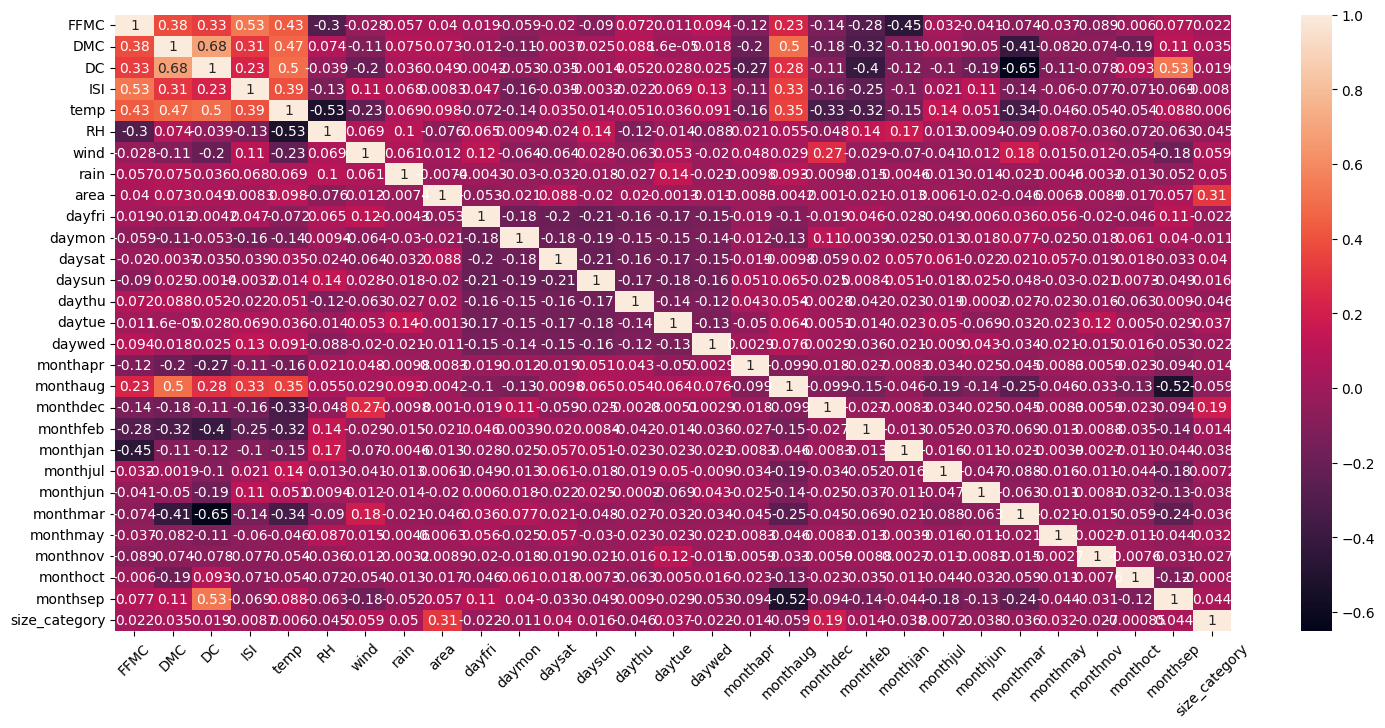

In [40]:
import seaborn as sns
fig= plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

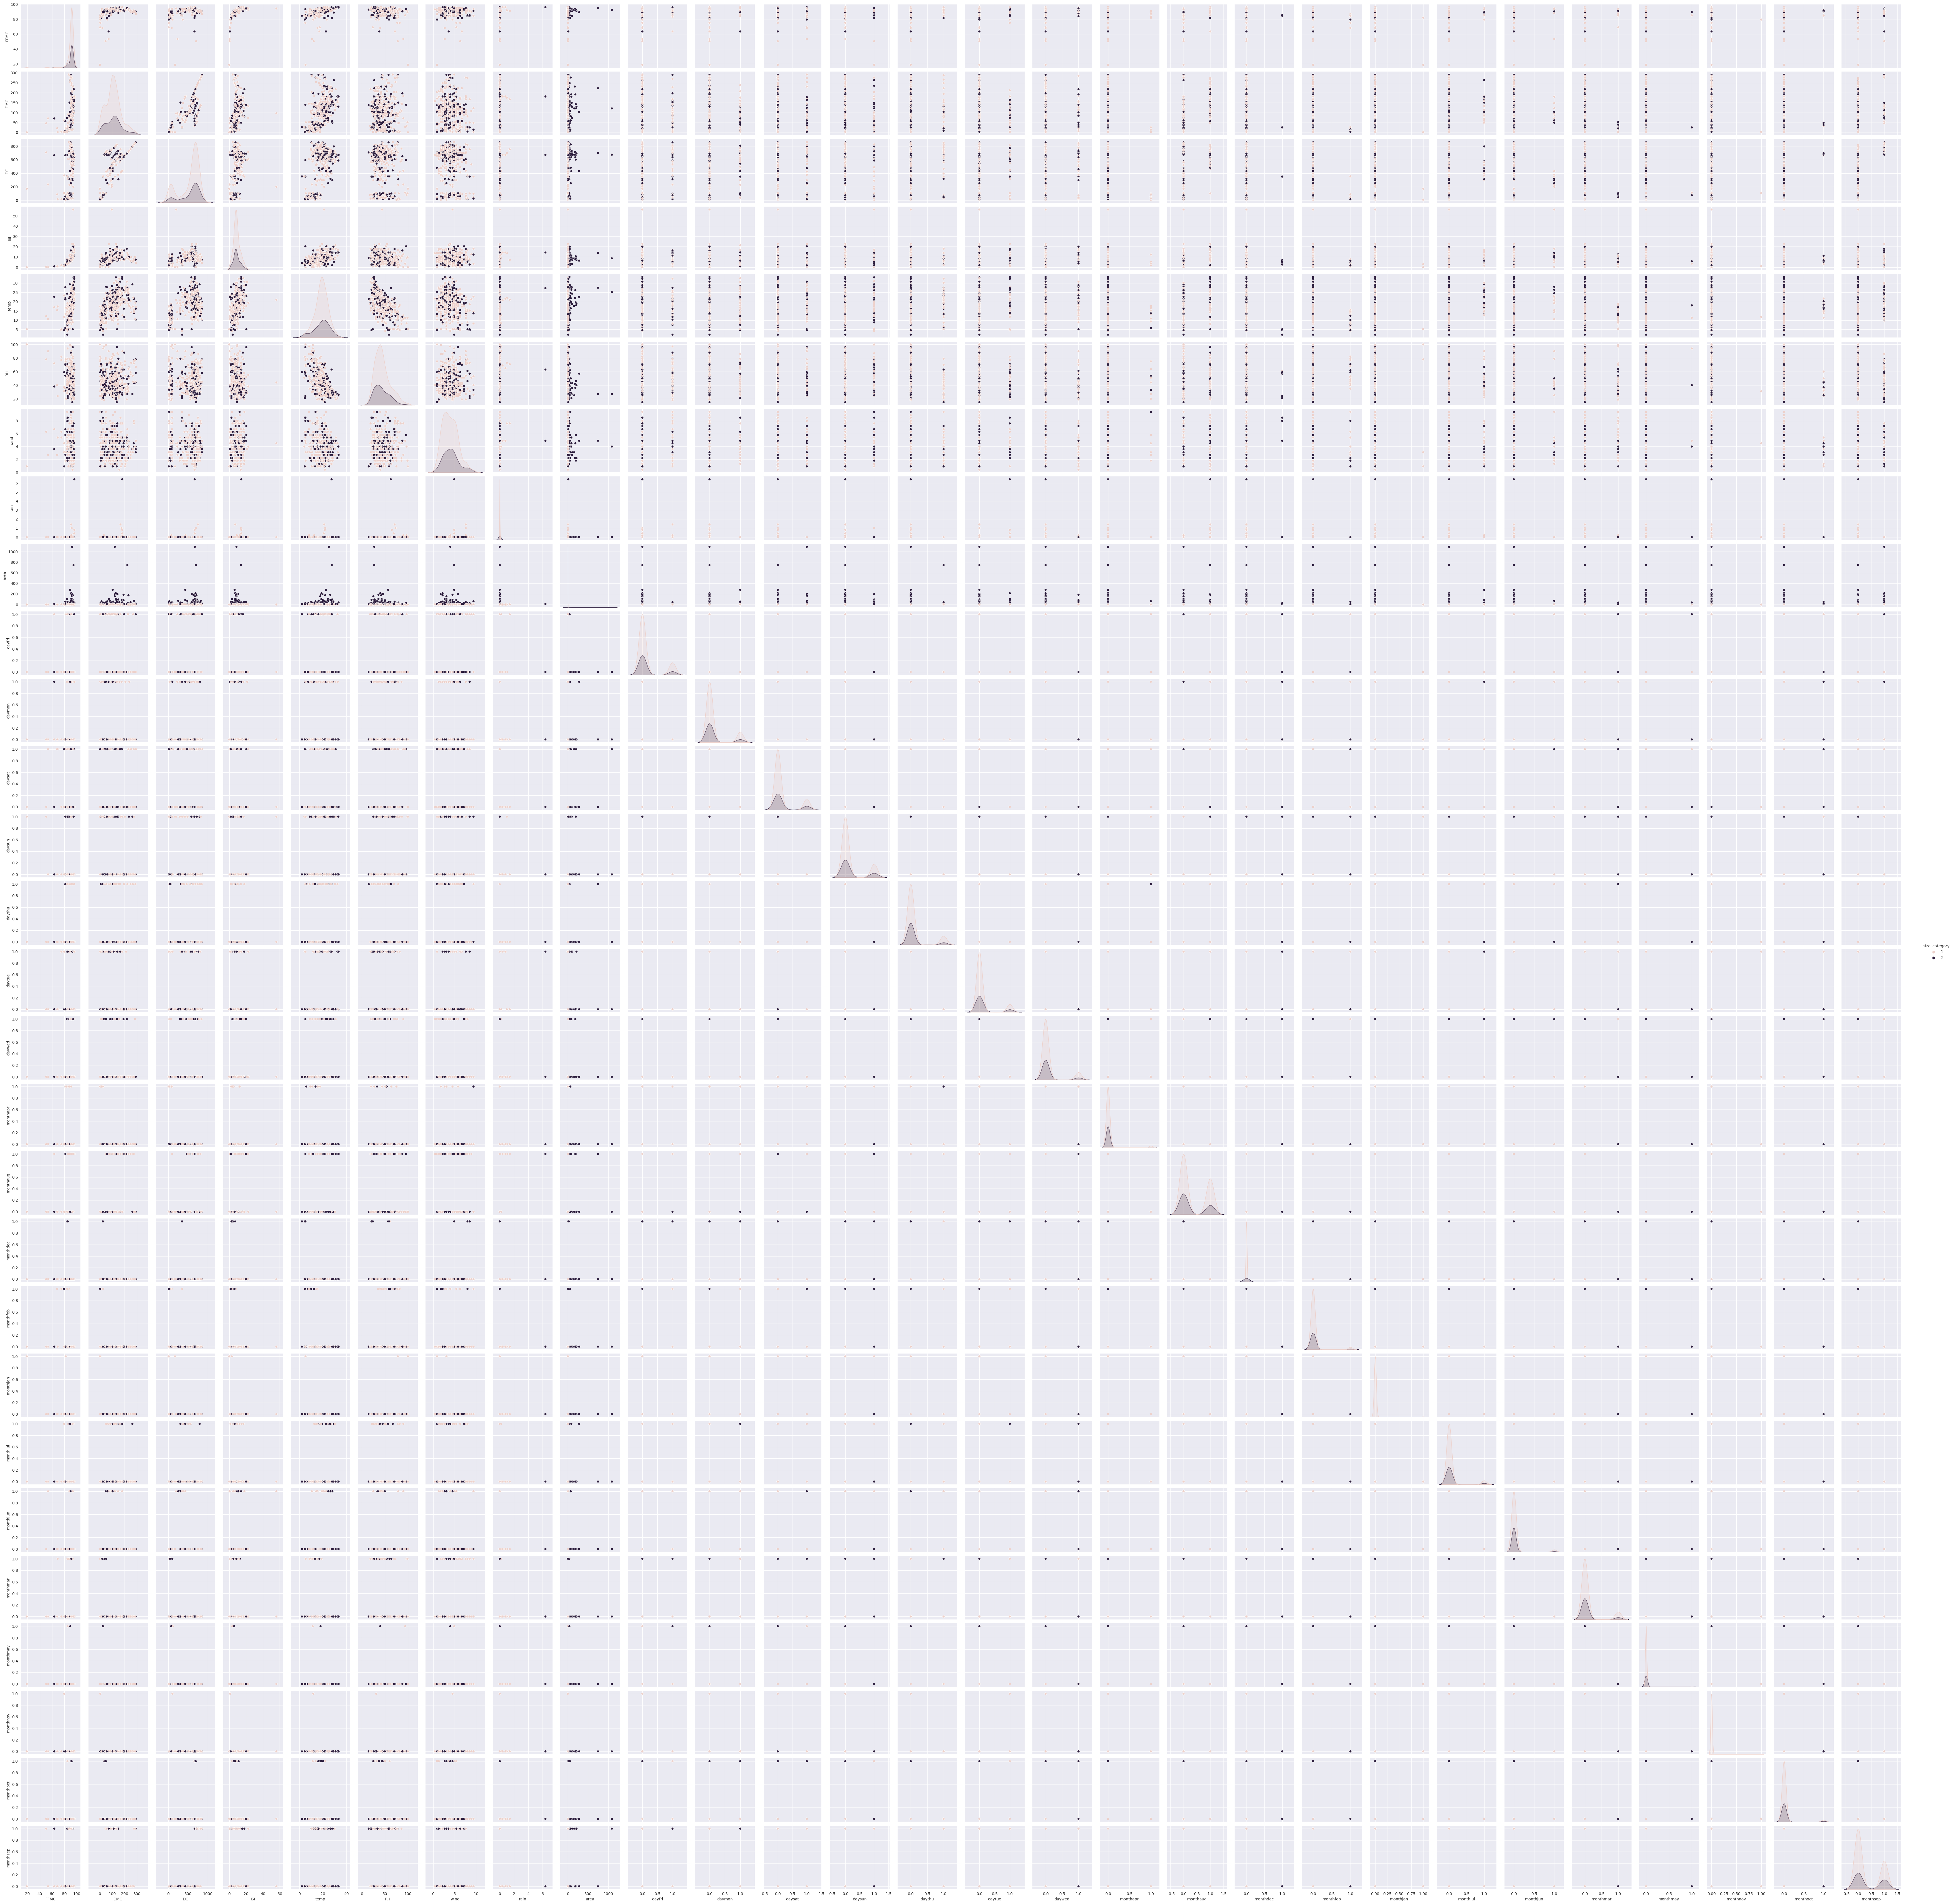

In [41]:
sns.set_style('darkgrid')
sns.pairplot(data, hue='size_category')
plt.show()

In [15]:
x = np.array(data.iloc[:,0:28])
y = np.array(data.iloc[:,28])

In [16]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
x_norm = norm_func(x)

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [25]:
y_test

array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1])

In [24]:
y_train

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,

In [23]:
x_test

array([[0.08406366, 0.04446115, 0.63813208, ..., 0.        , 0.00091672,
        0.        ],
       [0.08663049, 0.12779143, 0.63171501, ..., 0.        , 0.        ,
        0.        ],
       [0.08479704, 0.11184042, 0.72393752, ..., 0.        , 0.        ,
        0.00091672],
       ...,
       [0.08342195, 0.14960948, 0.68240989, ..., 0.        , 0.        ,
        0.        ],
       [0.08571376, 0.12779143, 0.54471783, ..., 0.        , 0.        ,
        0.        ],
       [0.07287962, 0.00275017, 0.09781453, ..., 0.00091672, 0.        ,
        0.        ]])

In [22]:
x_train

array([[0.08571376, 0.136867  , 0.66792564, ..., 0.        , 0.        ,
        0.00091672],
       [0.0825969 , 0.07599648, 0.67443438, ..., 0.        , 0.        ,
        0.00091672],
       [0.0869055 , 0.20387958, 0.64042389, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0825969 , 0.03639397, 0.07938836, ..., 0.        , 0.        ,
        0.        ],
       [0.0836053 , 0.08644714, 0.68240989, ..., 0.        , 0.        ,
        0.00091672],
       [0.0836053 , 0.0442778 , 0.08965568, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
model = Sequential()
model.add(Dense(8, input_dim=28, activation='linear'))
model.add(Dense(4,  activation='tanh'))
model.add(Dense(1,  activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history=model.fit(x_train, y_train, validation_split=0.3, epochs=120, batch_size=10)


Epoch 1/120
29/29 [==============================] - 2s 10ms/step - loss: 0.4882 - accuracy: 0.7266 - val_loss: 0.4266 - val_accuracy: 0.7419
Epoch 2/120
29/29 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.7266 - val_loss: 0.2751 - val_accuracy: 0.7419
Epoch 3/120
29/29 [==============================] - 0s 12ms/step - loss: 0.1625 - accuracy: 0.7266 - val_loss: 0.1277 - val_accuracy: 0.7419
Epoch 4/120
29/29 [==============================] - 0s 12ms/step - loss: 0.0173 - accuracy: 0.7266 - val_loss: -0.0054 - val_accuracy: 0.7419
Epoch 5/120
29/29 [==============================] - 0s 15ms/step - loss: -0.1111 - accuracy: 0.7266 - val_loss: -0.1219 - val_accuracy: 0.7419
Epoch 6/120
29/29 [==============================] - 0s 4ms/step - loss: -0.2219 - accuracy: 0.7266 - val_loss: -0.2237 - val_accuracy: 0.7419
Epoch 7/120
29/29 [==============================] - 0s 3ms/step - loss: -0.3185 - accuracy: 0.7266 - val_loss: -0.3144 - val_accuracy: 0.7419
Ep

In [29]:
##evaluate keras model
scores=model.evaluate(x,y)

17/17 [==============================] - 0s 4ms/step - loss: -4.5368 - accuracy: 0.7311


In [30]:
print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))

accuracy:73.11%


In [31]:
##plot result
import matplotlib.pyplot as plt


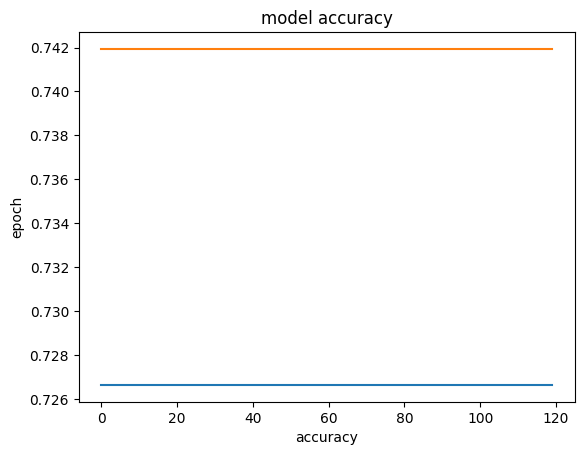

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
##plt.legend(['train','test'],loc='upper left')
plt.show()

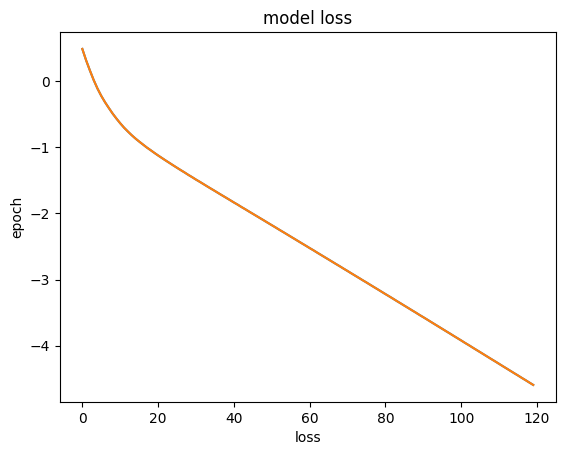

In [36]:
##summerize history
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
##plt.legend(['train','test'],loc='upper left')
plt.show()